In [1]:
import tensorflow as tf
from os import listdir
import cv2
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import imutils
from .utility import *



Using TensorFlow backend.


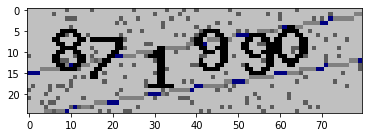

[8, 7, 1, 9, 9, 0]


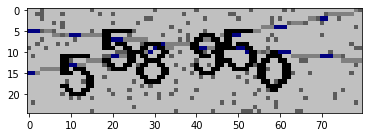

[5, 5, 8, 9, 5, 0]


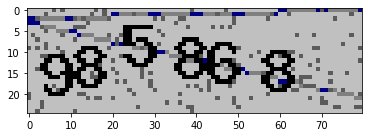

[9, 8, 5, 8, 6, 8]


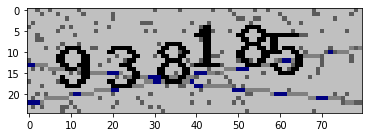

[9, 3, 8, 1, 8, 5]


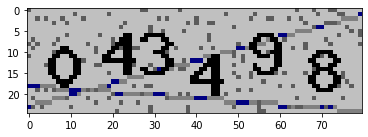

[0, 4, 3, 4, 9, 8]


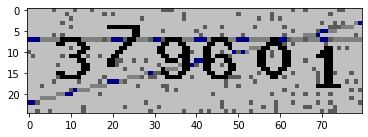

[3, 7, 9, 6, 0, 1]


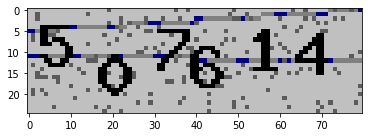

[5, 0, 7, 6, 1, 4]


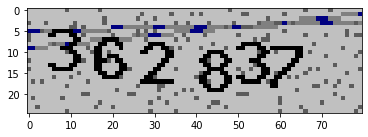

[3, 6, 2, 8, 3, 7]


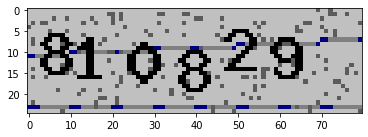

[8, 1, 0, 8, 2, 9]


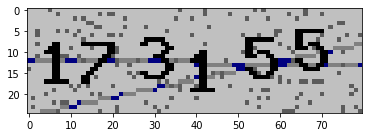

[1, 7, 3, 1, 5, 6]


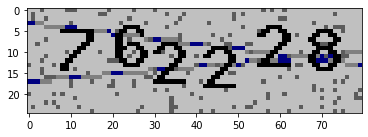

[7, 6, 2, 2, 2, 8]


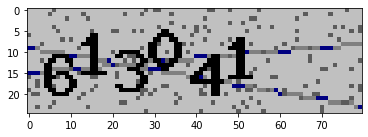

[6, 1, 3, 0, 4, 1]


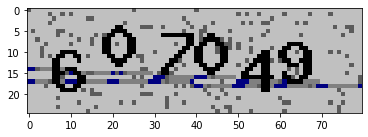

[6, 0, 7, 0, 4, 9]


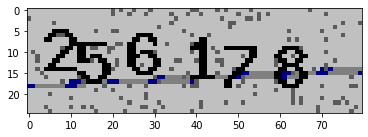

[2, 5, 6, 1, 7, 8]


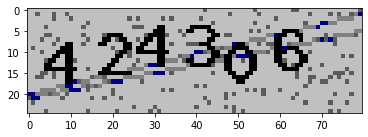

[4, 2, 4, 3, 0, 6]


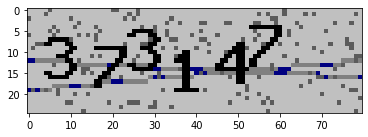

[3, 7, 3, 1, 4, 7]


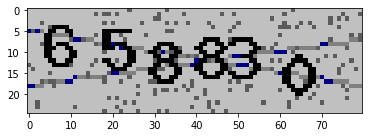

[6, 5, 8, 8, 3, 0]


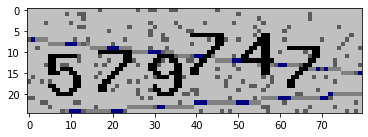

[5, 7, 9, 7, 4, 7]


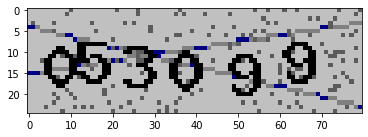

[0, 5, 3, 0, 9, 9]


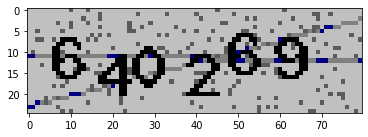

[6, 4, 0, 2, 6, 9]


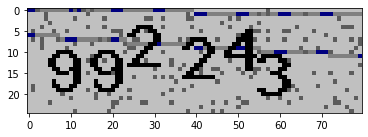

[9, 9, 2, 2, 4, 3]


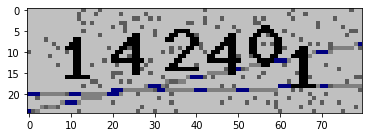

[1, 4, 2, 4, 0, 1]


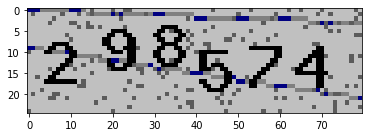

[2, 9, 8, 5, 7, 4]


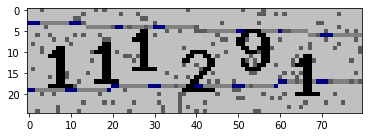

[1, 1, 1, 2, 9, 1]


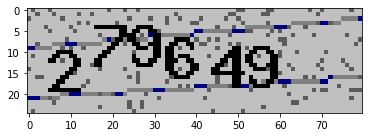

[2, 7, 9, 6, 4, 9]


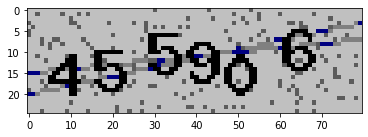

[4, 5, 5, 9, 0, 6]


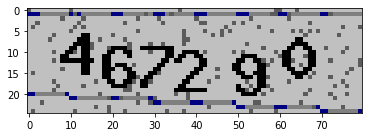

[4, 6, 7, 2, 9, 0]


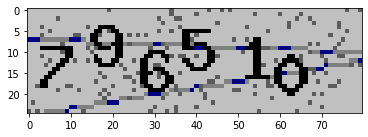

[7, 9, 6, 5, 1, 0]


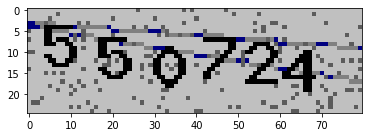

[5, 5, 0, 7, 2, 4]


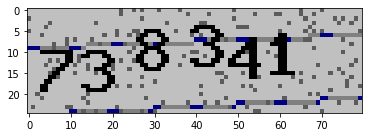

[7, 3, 8, 3, 4, 1]


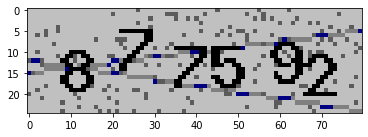

[8, 7, 7, 5, 9, 2]


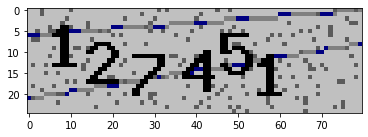

[1, 2, 7, 4, 5, 1]


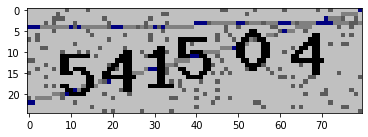

[5, 4, 1, 5, 0, 4]


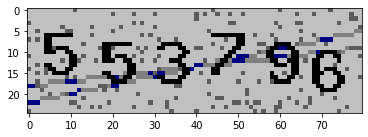

[9, 5, 3, 7, 9, 6]


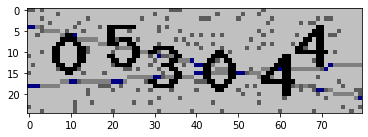

[0, 5, 3, 0, 4, 4]


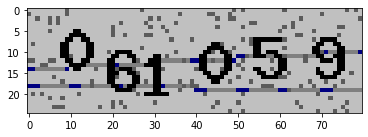

[0, 6, 1, 0, 5, 9]


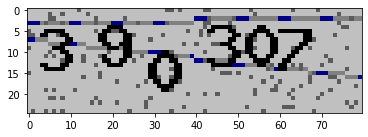

[3, 9, 0, 3, 0, 7]


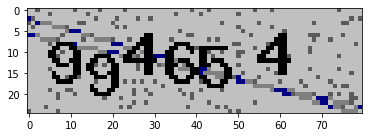

[9, 9, 4, 6, 5, 4]


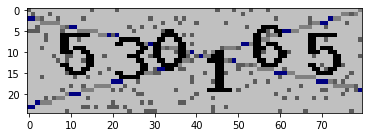

[9, 5, 3, 0, 1, 6]


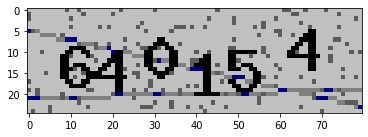

[6, 4, 0, 1, 5, 4]


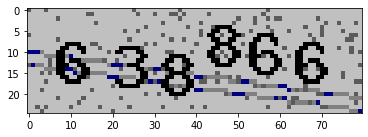

[6, 3, 8, 8, 6, 6]


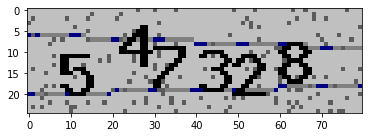

[5, 4, 7, 3, 2, 8]


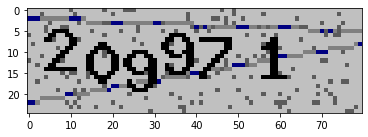

[2, 0, 9, 9, 7, 1]


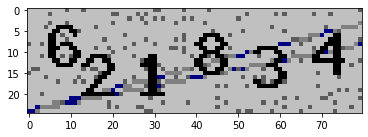

[6, 2, 1, 8, 3, 4]


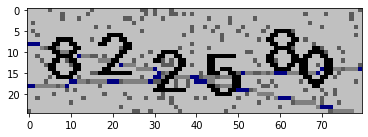

[8, 2, 2, 5, 8, 0]


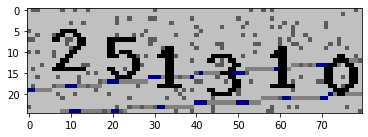

[2, 5, 1, 3, 1, 0]


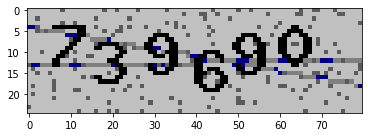

[7, 3, 9, 6, 9, 0]


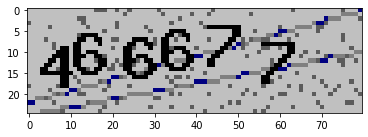

[4, 6, 6, 6, 7, 7]


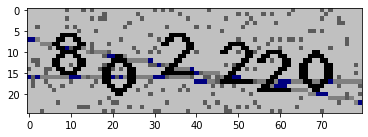

[8, 0, 2, 2, 2, 0]


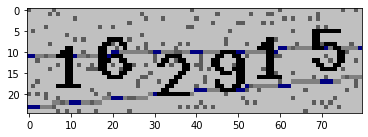

[1, 6, 2, 9, 1, 5]


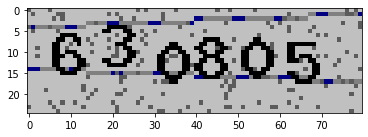

[6, 3, 0, 8, 0, 5]


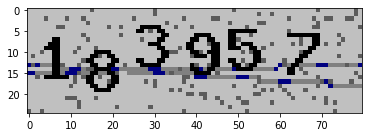

[1, 8, 3, 9, 5, 7]


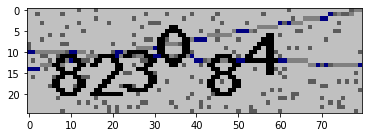

[8, 2, 3, 0, 8, 4]


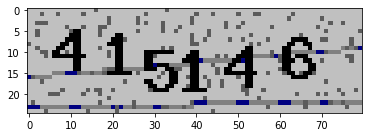

[4, 1, 5, 1, 4, 6]


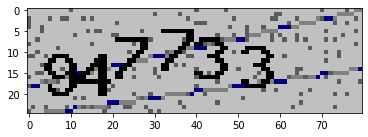

[9, 4, 7, 7, 3, 3]


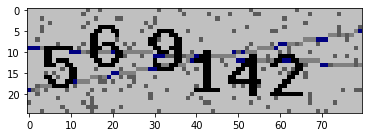

[5, 6, 9, 1, 4, 2]


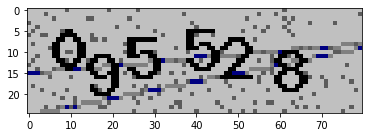

[0, 9, 5, 6, 2, 8]


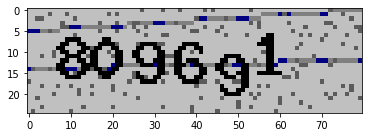

[8, 0, 9, 6, 9, 1]


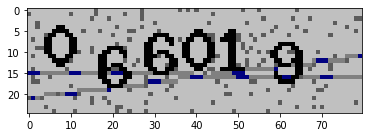

[0, 6, 6, 0, 1, 9]


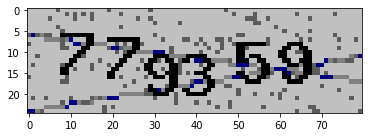

[7, 7, 9, 3, 5, 9]


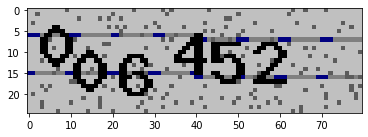

[0, 0, 6, 4, 5, 2]


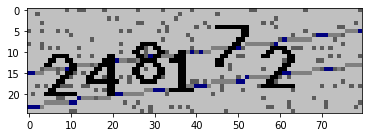

[2, 4, 8, 1, 7, 2]


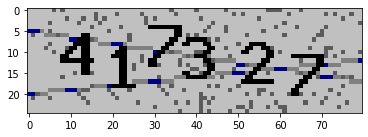

[4, 1, 7, 3, 2, 7]


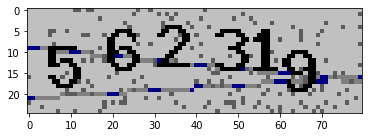

[5, 6, 2, 3, 1, 9]


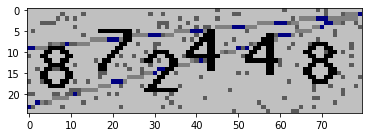

[8, 7, 2, 4, 4, 8]


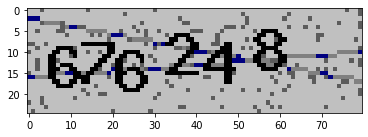

[8, 7, 6, 2, 4, 8]


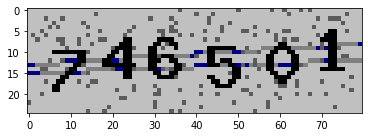

[7, 4, 6, 5, 0, 1]


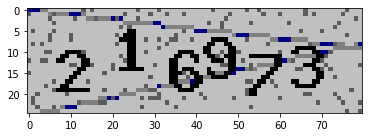

[2, 1, 6, 9, 7, 3]


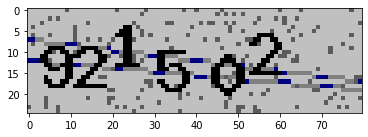

[9, 2, 1, 5, 0, 2]


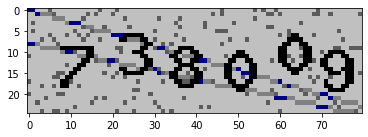

[7, 3, 8, 0, 0, 9]


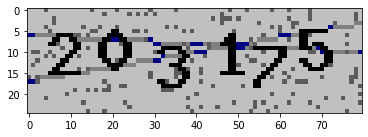

[2, 0, 3, 1, 7, 5]


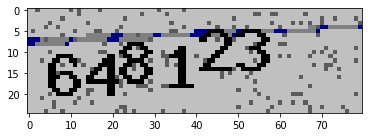

[6, 4, 8, 1, 2, 3]


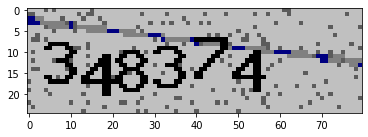

[3, 4, 8, 3, 7, 4]


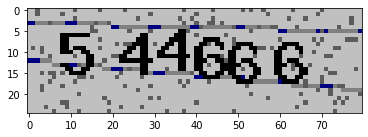

[5, 4, 4, 6, 6, 6]


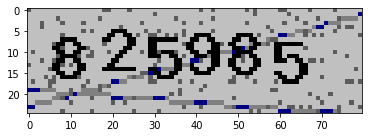

[8, 2, 9, 5, 9, 8]
5


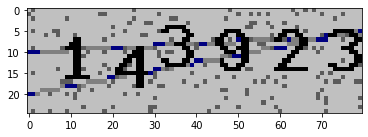

[]


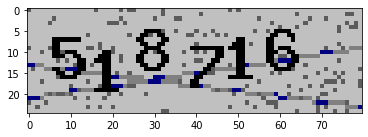

[5, 1, 8, 7, 1, 6]


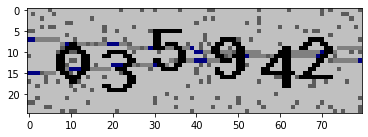

[0, 3, 5, 9, 4, 2]


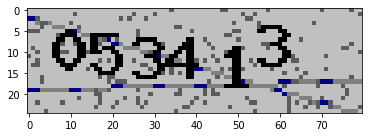

[0, 5, 3, 4, 1, 3]


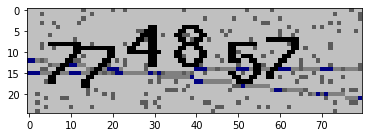

[7, 2, 4, 8, 5, 7]


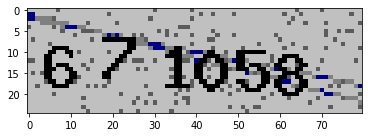

[6, 7, 1, 0, 5, 8]


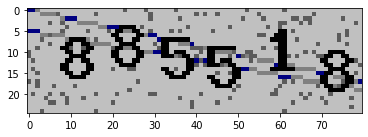

[8, 8, 9, 5, 1, 8]


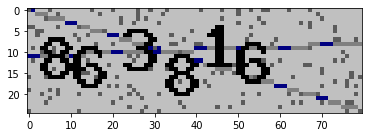

[8, 6, 3, 8, 1, 6]


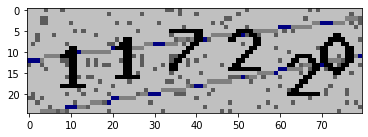

[1, 1, 7, 2, 2, 0]


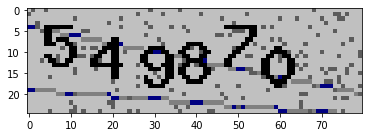

[5, 4, 9, 8, 7, 0]


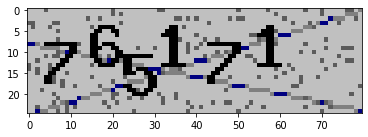

[7, 9, 0, 1, 7, 1]


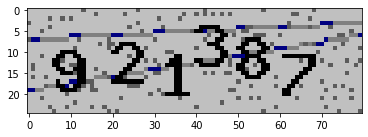

[9, 2, 1, 3, 8, 7]


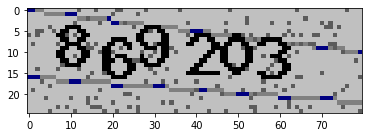

[8, 6, 9, 2, 0, 3]


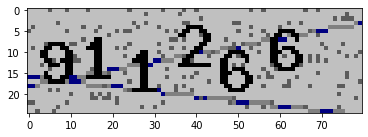

[9, 1, 1, 2, 6, 6]


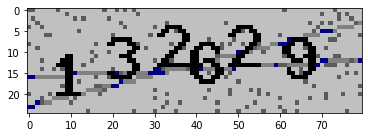

[1, 3, 2, 6, 2, 9]


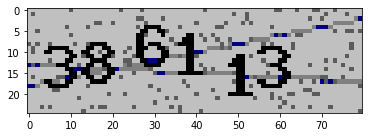

[3, 8, 6, 1, 1, 3]


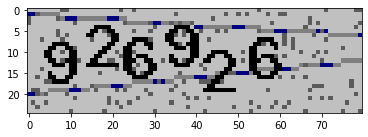

[9, 2, 6, 9, 2, 6]


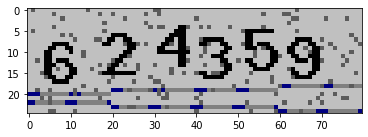

[6, 2, 4, 3, 5, 9]


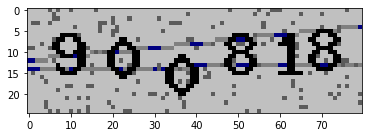

[9, 0, 0, 8, 1, 8]


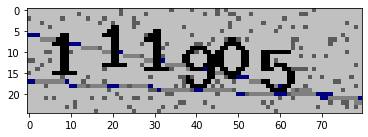

[1, 1, 1, 9, 0, 5]


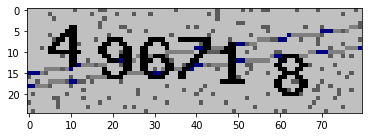

[4, 9, 6, 7, 1, 8]


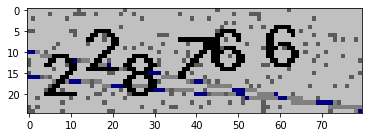

[2, 2, 8, 2, 6, 6]


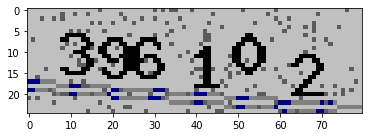

[3, 9, 6, 1, 0, 2]


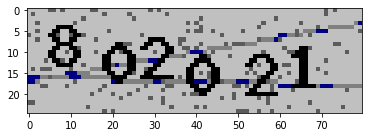

[8, 0, 2, 0, 2, 1]


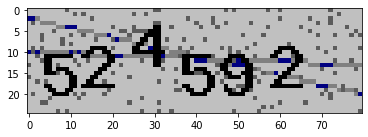

[9, 5, 2, 4, 9, 2]


In [15]:
model = load_model('model.hdf5')
sample_captcha = [f for f in listdir('captcha')][:100]

for captcha in sample_captcha:
    # read file
    image = cv2.imread('captcha/'+captcha)
    
    # segment to individual image
    digits = segment_image(image)

    result = []
    if digits is not None:
        
        for digit in digits:
            # resize image
            digit = resize_image(digit, 12, 12)
            
            digit = digit/255.0

            digit = np.expand_dims(digit, axis=2)
            digit = np.expand_dims(digit, axis=0)

            #print(digit.shape)
            pred = model.predict(digit)

            #append the prediction
            result.append(np.argmax(pred, -1)[0])

    #show image
    imgplot = plt.imshow(image)
    plt.show() 

    #show result
    print(result)
